<h1>Bike Sharing Demand</h1>

<ol>
    <li><h4>Introduction </h4></li>
    <li><h4>Hypothesis Generation</h4></li>
    <li><h4>Understanding data</h4></li>
    <li><h4>Data Summary</h4></li>
    <li><h4>Exploratory data analysis (EDA) & Feature engineering</h4></li>
    <ul> 
        <li><h4>EDA</h4></li>
        <li><h5>Feature engineering</h5>
        <ul>
            <li><h6>separate the datetime column as year,month day of week and hour </h6></li>
            <li><h6>dropping unncessary columns</h6></li>
            <li><h6>treat skewness in distribution using log transform</h6></li>
            <li><h6>convert categorical data to numeric data</h6></li>
            <li><h6>classified data</h6></li>
            <li><h6>handling NAN value (in our case zero's value)</h6></li>
            <li><h6>encoding cyclical features</h6></li>
            <li><h6>convert continuous data (humidity,wind speed,temp) to categorical using binning</h6></li>
            <li><h6>adding dummy varibles to categorical data</h6></li>
            <li><h6>encoding cyclical features</h6></li>
            </ul>
        </li>
            </ul>
   <li><h4>Feature Scaling  </h4></li>
   <li><h4>ML Algorithms </h4>
    <ul>
        <li><h5> Linear Regression</h5></li>
        <li><h5> Regularization Model - Ridge</h5></li>
        <li><h5>K-Nearest Neighbor</h5></li>
        <li><h5>Decision Trees </h5></li>
        </ul>
    </li>
                </ol>
   

<h2>1. Introduction</h2>
<h6>Bike-sharing is one of the methods of reducing city traffic. It is also lowering air pollution by reducing the number of cars on the roads. The hypothesis in Kaggle say's that bike-sharing is highly related to the time of the day, season, and weather conditions. SO,we will try predicting the hourly count of bikes rented for the Bikeshare rental system </h6>

<h5>This predictive modeling can be useful for multiple reasons</h5>
<ul>
    <li>The predictions of future use could help for better management of the service. </li>
    <li>Better understand overall trends in bike share counts for this system. Is overall demand increasing or decresing?</li>
    <li>Knowing what influences the demand for bike sharing.</li>
    </ul>
    
 <h6>The result : By accurately predicting the demand for unknown periods, Capital Bikeshare can better prepare for the needs of their cusotmers.</h6>

<h2>2. Hypothesis Generation</h2>
<p>Before exploring data, we should spend some time thinking about the business problem, gaining the domain knowledge and may be gaining first hand experience of the problem</p>

<ul>
<li><strong>Hourly trend</strong>: There must be high demand during office timings. Early morning and late evening can have different trend (cyclist) and low demand during 10:00 pm to 4:00 am.</li>
    
<li><strong>Daily Trend:&nbsp;</strong>Registered users demand more bike on weekdays as compared to weekend or holiday.</li>
    
<li><strong>Rain: </strong>  In winter it will be difficult to do cycling
 so the demand of bikes will be lower&nbsp;on a rainy&nbsp;day as compared to a sunny&nbsp;day. Similarly, higher humidity will cause to lower the demand and vice versa.</li>
<li><strong> Year: </strong>The number of user rentals should increase as years passed </li>
<li><strong>Temperature: </strong> Should has a positive correlation with bike demand.</li>
</ul>

<h2>3. Understanding data</h2>

<p>The given train dataset has 10886 rows and 12 columns.</p>

<h6>Columns description:</h6>

<ul>
    <h6>Independent Variables (Features) </h6>
    <li> datetime : hourly date + timestamp </li>
    <li> season : 1 = spring, 2 = summer, 3 = fall, 4 = winter </li>
    <li> holiday : whether the day is considered a holiday</li>
    <li> workingday : whether the day is neither a weekend nor holiday</li>
    <li> weather :   
     <ol type="1">
          <li> Clear, Few clouds, Partly cloudy, Partly cloudy</li>
          <li> Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist</li>
          <li> Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds</li>
          <li>Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog</li>
        </ol> 
    <li> temp : temperature in Celsius</li>
    <li> atemp : “feels like” temperature in Celsius <br>
    ‘feels like’ temperature that gives you a better idea about how the weather will actually feel when you step outdoors.</li>
    <li> humidity : relative humidity</li>
    <li> windspeed : wind speed</li>
    <h6>Dependent Variables (Target varibles)</h6>
    <li> casual : number of non-registered user rentals initiated</li>
    <li> registered : number of registered user rentals initiated</li>
    <li> count : number of total rentals (registered + casual)</li>
</ul>


<h2>4. Data Summary</h2>

In [1]:
# import libraries

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from datetime import datetime
import calendar

%matplotlib inline
sns.set()

In [2]:
# import the dataset
df = pd.read_csv("train.csv")

In [3]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


<h6>We can realize that the minimum value of wind speed and humidity equal to zero BUT wind speed & humidity never drops to zero. That  gives us insight to treat with these values later </h6>

In [4]:
# checking the null value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


<h6>We have no missing values in the Dataset </h6>
<h6>Types of variables: </h6>
<ul>
    <li>Categorical - Season, Holiday, Working day, Weather</li>
    <li>Timeseries - Datetime</li>
    <li>Numerical - Temp, aTemp, Humidity, Windspeed, Casual, Registered, Count</li>
    </ul>


<h2>5. Exploratory data analysis (EDA) & Feature engineering</h2>

<h5>EDA </h5>
<p>EDA involves looking at and describing the data set from different angles and then summarizing it. This data pre-processing step is an essential one before starting statistical modeling or machine learning engines to ensure the correctness and effectiveness of data used.</p>
<p>By using EDA you will  get a better understanding of data, data patterns and get a better understanding of the problem statement
</p>

<h6>Feature engineering have two goals: </h6>
<ul>
   <li> Preparing the proper input dataset, compatible with the machine learning algorithm requirements</li>
    <li>Improving the performance of machine learning models</li>
    </ul>

<AxesSubplot:>

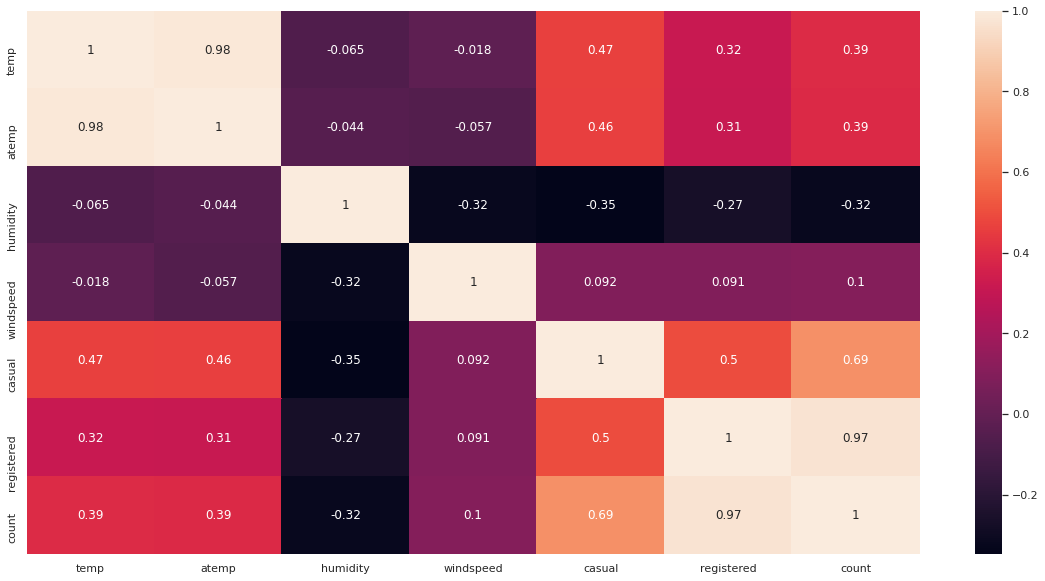

In [5]:
fig = plt.figure(figsize=[20,10])
cols = ['temp','atemp','humidity','windspeed','casual','registered','count']
sns.heatmap(df.loc[:,cols].corr(),annot=True,vmax=1)

<ul>
    <li><h6>Count is highly correlated with casual and registered. It's because Count is derived from casual and registered</h6></li>
    <li><h6>temp and atemp are highly correlated</h6></li>
    </ul>
    
<h6>So, we want to ensure that temp and atemp have a similar context for a purpose will clarify later</h6>

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='temp', ylabel='atemp'>

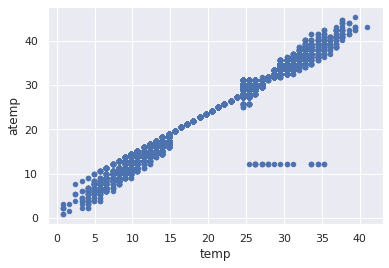

In [6]:
df.plot.scatter(x='temp', y='atemp')

<h6>The distribution of variable 'temp' and 'atemp' that almost have similar context. We would be using the 'temp' and getting rid of the 'atemp' variables for better precision value and avoiding multi-collinearity</h6>

<h6> We decide to get rid of aTemp instead of temp because when casual users feel good(aTemp), they take bicycles, and their number is not large compared to registered users. BUT the number of registered users don't base on how they feel(aTemp)  significantly</h6>


In [7]:
df = df.drop(["atemp"],axis=1)

In [8]:
# convert datetime's from object type to datetime
df.datetime = pd.to_datetime(df.datetime)

# range of datatime 
print('The first datetime of dataset is {}, The last datetime of dataset is {}'
      .format(df.datetime.min(),df.datetime.max()))

The first datetime of dataset is 2011-01-01 00:00:00, The last datetime of dataset is 2012-12-19 23:00:00


In [9]:
# separate the datetime column as year,month,day of week and hour 
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['weekday'] = df['datetime'].dt.day_name()
df['hour'] = df['datetime'].dt.hour

In [10]:
# dropping unncessary columns
df = df.drop(["datetime"],axis=1)

In [11]:
# change the order of dataframe columns
df = df[['year', 'month', 'weekday','hour', 'season',
         'holiday', 'workingday', 'weather', 'temp', 'humidity',
         'windspeed', 'casual', 'registered', 'count']]
df.head()

,year,month,weekday,hour,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,count
0,2011,1,Saturday,0,1,0,0,1,9.84,81,0.0,3,13,16
1,2011,1,Saturday,1,1,0,0,1,9.02,80,0.0,8,32,40
2,2011,1,Saturday,2,1,0,0,1,9.02,80,0.0,5,27,32
3,2011,1,Saturday,3,1,0,0,1,9.84,75,0.0,3,10,13
4,2011,1,Saturday,4,1,0,0,1,9.84,75,0.0,0,1,1


<h6>Let's check the distribution of variables. We exception the casual and registered and we'll be satisfied with the count to express them
</h6>

/home/qamar/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


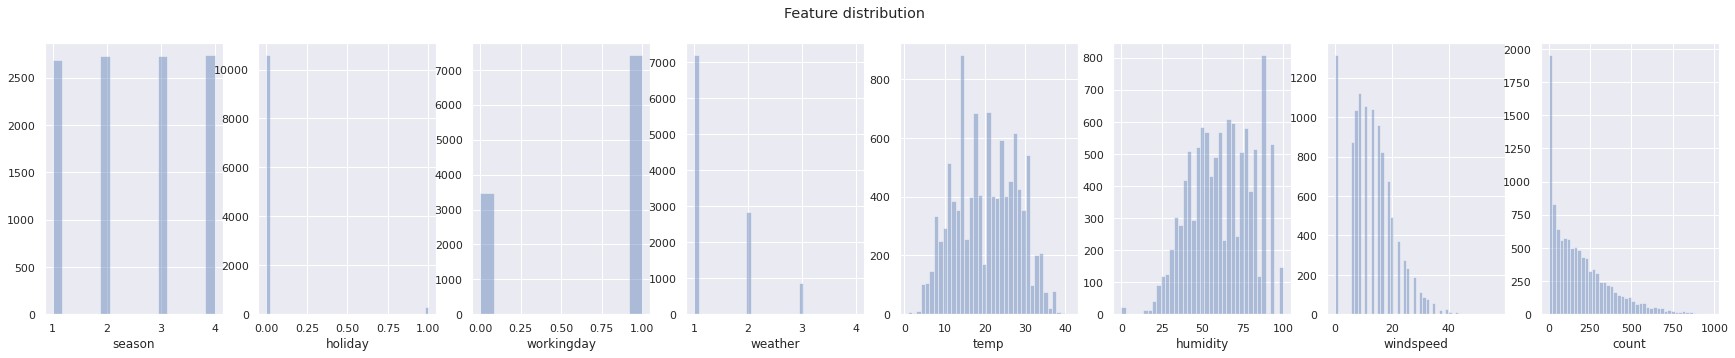

In [12]:
def plot_distribution(df,**kwargs ):
    columns = ['season', 'holiday', 'workingday', 'weather', 'temp',
       'humidity', 'windspeed', 'count']
    fig, axes = plt.subplots(ncols=len(columns),figsize=(30,5))
    for axs, col in zip(axes, columns):
        sns.distplot(df[col], ax=axs,**kwargs)
        fig.suptitle('Feature distribution')
    
plot_distribution(df, kde=False)

<h6> By looking at the these histograms we can see that : </h6>
<ul>
    <li>Season has four categories of almost equal distribution</li>
    <li>Mostly working days and variable holiday is also showing a similar inference </li>
    <li>Weather 1 has higher contribution (clear weather) </li>
    <li>Variables temp, atemp, humidity and windspeed  looks naturally distributed </li>
    <li>Our target variable, count is not normally distributed (right-skewed) and there are multiple outliers in the variable</li>
    </ul>

<h3>Skewness In Distribution (count) </h3>

<AxesSubplot:xlabel='count', ylabel='Density'>

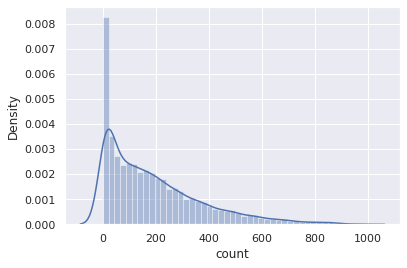

In [13]:
sns.distplot(df['count'])

<h6>"count" variable contains lot of outlier data points which skews the distribution towards right</h6>

[Text(0.5, 0, 'Working Day'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Count Across Working Day')]

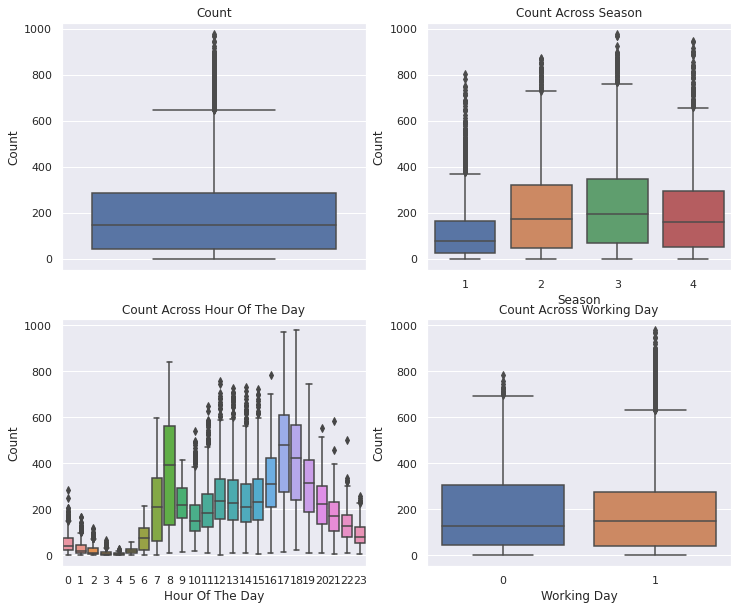

In [14]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(12, 10)

# box plot use the IQR method for finding display data and outliers
sns.boxplot(data=df,y="count",orient="v",ax=axes[0][0])
sns.boxplot(data=df,y="count",x="season",orient="v",ax=axes[0][1])
sns.boxplot(data=df,y="count",x="hour",orient="v",ax=axes[1][0])
sns.boxplot(data=df,y="count",x="workingday",orient="v",ax=axes[1][1])

axes[0][0].set(ylabel='Count',title="Count")
axes[0][1].set(xlabel='Season', ylabel='Count',title="Count Across Season")
axes[1][0].set(xlabel='Hour Of The Day', ylabel='Count',title="Count Across Hour Of The Day")
axes[1][1].set(xlabel='Working Day', ylabel='Count',title="Count Across Working Day")

<h5>Outliers Analysis</h5>
<h6>We can inference from the box plots given below : </h6>
<ul>
    <li>Spring season has got relatively lower count.The dip in median value in boxplot gives evidence for it</li>
    <li>People more rent bike on summer and fall</li>
    <li>The boxplot with "Hour Of The Day", the median value are relatively higher at 7AM - 8AM and 5PM - 6PM. It can be attributed to regular school and office users at that time</li>
    <li>People prefer the morning and evening times for renting bike</li>
    <li>Most of the outlier points are mainly contributed from "Working Day" than "Non Working Day"</li>
   </ul>
   
       
        
<p>These outliers are not generated due to error, so we consider them as natural outliers. They might be a result of groups of people taking up cycling or for a bike race or other reasons. To treat such outliers, we will use logarithm transformation </p>

<h6>As this is a highly skewed data, we will try to transform this data using log transform
</h6>

<h6>Log Transform</h6>

<p>Log transforms are useful when applied to skewed distributions as they tend to expand the values which fall in the range of lower magnitudes and tend to compress or reduce the values which fall in the range of higher magnitudes. This tends to make the skewed distribution as normal-like as possible</p>

/home/qamar/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


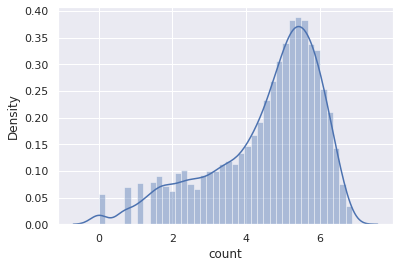

0        2.772589
1        3.688879
2        3.465736
3        2.564949
4        0.000000
           ...   
10881    5.817111
10882    5.484797
10883    5.123964
10884    4.859812
10885    4.477337
Name: count, Length: 10886, dtype: float64


In [15]:
df['count']=df['count'].apply(lambda x:np.log(x))
sns.distplot(df['count'])
plt.show()
print (df['count'])

In [16]:
df.describe()

,year,month,hour,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2011.501929,6.521495,11.541613,2.506614,0.028569,0.680875,1.418427,20.23086,61.886460,12.799395,36.021955,155.552177,4.552561
std,0.500019,3.444373,6.915838,1.116174,0.166599,0.466159,0.633839,7.79159,19.245033,8.164537,49.960477,151.039033,1.489043
min,2011.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.82000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2011.000000,4.000000,6.000000,2.000000,0.000000,0.000000,1.000000,13.94000,47.000000,7.001500,4.000000,36.000000,3.737670
50%,2012.000000,7.000000,12.000000,3.000000,0.000000,1.000000,1.000000,20.50000,62.000000,12.998000,17.000000,118.000000,4.976734
75%,2012.000000,10.000000,18.000000,4.000000,0.000000,1.000000,2.000000,26.24000,77.000000,16.997900,49.000000,222.000000,5.648974
max,2012.000000,12.000000,23.000000,4.000000,1.000000,1.000000,4.000000,41.00000,100.000000,56.996900,367.000000,886.000000,6.884487


<h6> *** The "count" range values became between 0-7 ***</h6>

<h2>Visualizing Count Vs (Year,Month,Weekday,Hour,Season,Usertype)</h2>

1. Understand the effect of the year on the count.

2. Understand the effect of the month on the count.

3. Verify the effect of season, hour per day on the count. Which season tends to more rental?

4. Understand the effect of weekday, hour of  day on the count. Check if there are some days and times when the count is clearly less or negligible compare to other days and hours?

5. Understand the effect of user type on the count.

6. Understand the effect of user type, week day on the count.

(array([  30.,  101.,  246.,  314.,  321.,  385.,  609., 1218., 1487.,
         753.]),
 array([0.        , 0.68844867, 1.37689733, 2.065346  , 2.75379466,
        3.44224333, 4.13069199, 4.81914066, 5.50758932, 6.19603799,
        6.88448665]),
 <BarContainer object of 10 artists>)

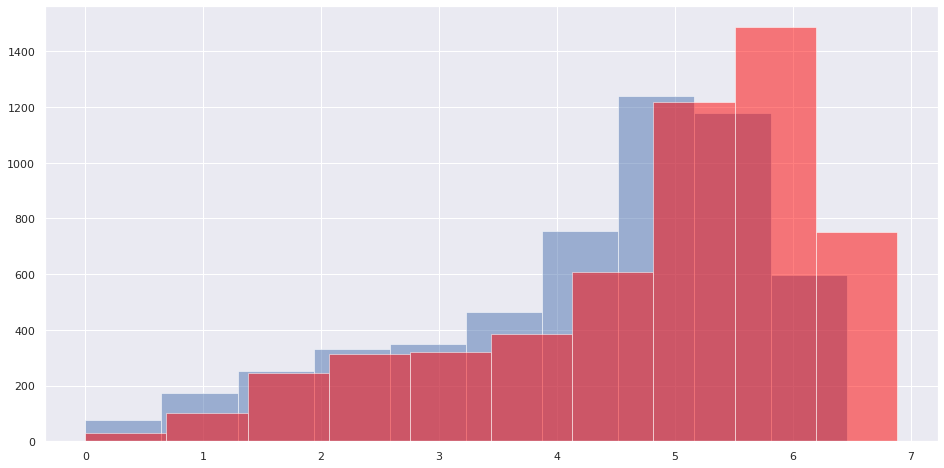

In [17]:
plt.figure(figsize=(16,8))
plt.hist(df['count'][df['year'] == 2011], alpha=0.5, label='2011')
plt.hist(df['count'][df['year'] == 2012], alpha=0.5, label='2012', color='red')

<h6>As we expected before, the number of user rentals increase as years passed. So, our hypothesis is true</h6>

[Text(0.5, 0, 'Weekday'),
 Text(0, 0.5, 'Avearage Count'),
 Text(0.5, 1.0, 'Average casual users By day of week')]

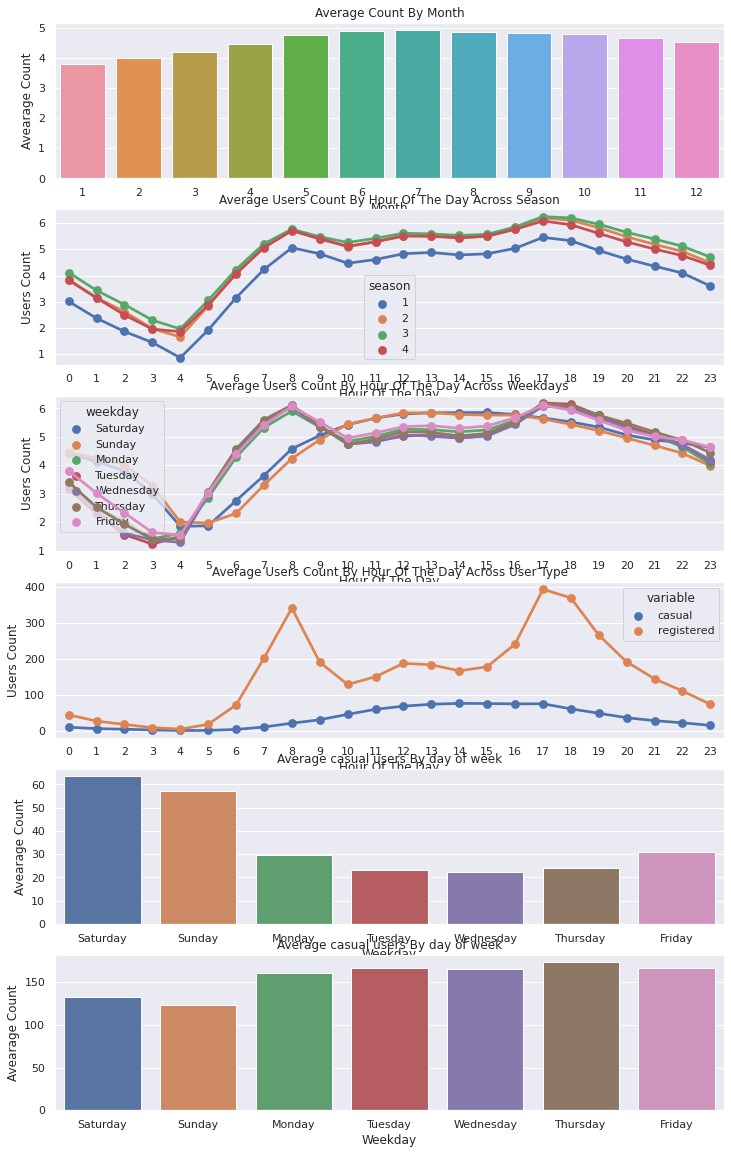

In [18]:
fig,(ax1,ax2,ax3,ax4, ax5,ax6)= plt.subplots(nrows=6)
fig.set_size_inches(12,20)

sns.barplot(data=df,x="month",y="count",ax=ax1,ci=None)
ax1.set(xlabel='Month', ylabel='Avearage Count',title="Average Count By Month")

sns.pointplot(x=df["hour"], y=df["count"],hue=df["season"], data=df,ax=ax2,ci=None)
ax2.set(xlabel='Hour Of The Day', ylabel='Users Count',title="Average Users Count By Hour Of The Day Across Season",label='small')

sns.pointplot(x=df["hour"], y=df["count"],hue=df["weekday"], data=df,ax=ax3,ci=None)
ax3.set(xlabel='Hour Of The Day', ylabel='Users Count',title="Average Users Count By Hour Of The Day Across Weekdays",label='small')

hourTransformed = pd.melt(df[["hour","casual","registered"]], id_vars=['hour'], value_vars=['casual', 'registered'])
sns.pointplot(x=hourTransformed["hour"], y=hourTransformed["value"],hue=hourTransformed["variable"],hue_order=["casual","registered"], data=hourTransformed,ax=ax4,ci=None)
ax4.set(xlabel='Hour Of The Day', ylabel='Users Count',title="Average Users Count By Hour Of The Day Across User Type",label='small')

sns.barplot(data=df,x="weekday",y="casual",ax=ax5,ci=None)
ax5.set(xlabel='Weekday', ylabel='Avearage Count',title="Average casual users By day of week")

sns.barplot(data=df,x="weekday",y="registered",ax=ax6,ci=None)
ax6.set(xlabel='Weekday', ylabel='Avearage Count',title="Average casual users By day of week")


<ul>
    <li>Bike rentals in colder months (December, January, February, March) demand reduced, however demand increase     on the rest of months</li>
    <li>The rental count is generally low in spring & winter and it peaks in Summer. Therefore June, July, and          August has got a relatively higher demand. </li>
    <li>The peak user count around 7 AM-9 AM and 5 PM-7 PM is purely contributed by the registered users</li>
        <li>Casual no. of users peaked on weekends(saturday,sunday) that is , they did not require a registration as they rode the bikes in their free time only </li>
    <li>Registered no. of users peaked on weekdays , using the bikes to avoid traffic and reaching office/schools/etc on time, so they must have registered as they require bikes almost everyday </li>
    <li>friday : 0, monday : 1, saturday : 2, sunday : 3, thursday : 4, tuesday : 5, wednesday : 6</li>
</ul>

    
    
    
    

<h6>Feature Engineering on Categorical Data & Continuous Data</h6>

In [19]:
# convert categorical data to numeric data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['weekday'] = le.fit_transform(df['weekday'])

In [20]:
# if the hour is from 5:00 to 20:00 the data is classified as 0, if not in this interval it's 1.
df['is_night'] = np.where((df['hour'] < 5) | (df['hour'] > 19), 1, 0)
df.head()

,year,month,weekday,hour,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,count,is_night
0,2011,1,2,0,1,0,0,1,9.84,81,0.0,3,13,2.772589,1
1,2011,1,2,1,1,0,0,1,9.02,80,0.0,8,32,3.688879,1
2,2011,1,2,2,1,0,0,1,9.02,80,0.0,5,27,3.465736,1
3,2011,1,2,3,1,0,0,1,9.84,75,0.0,3,10,2.564949,1
4,2011,1,2,4,1,0,0,1,9.84,75,0.0,0,1,0.000000,1


<h3>Count vs temp, humadity, windspeed</h3>

<h6>Using Bivariate Plotting, will understand the relashonship between Count vs temp, humadity, windspeed</h6>

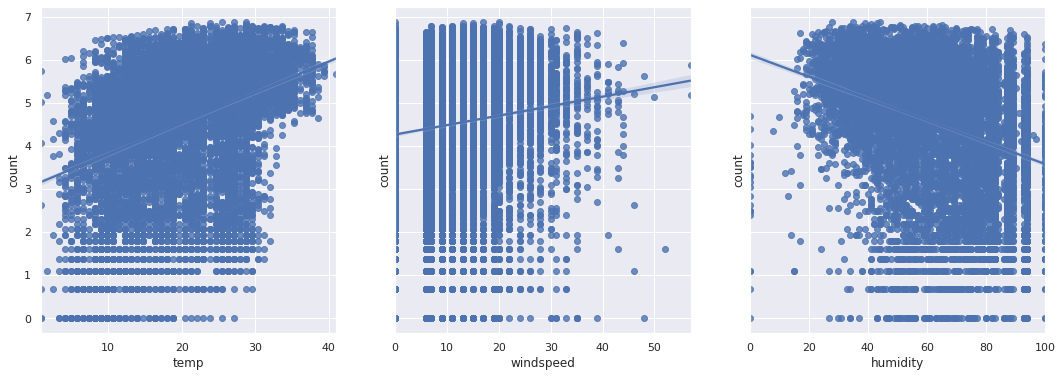

In [21]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True, figsize = (18, 6))
sns.regplot(x="temp", y="count", data=df, ax=ax1)
sns.regplot(x="windspeed", y="count", data=df, ax=ax2)
sns.regplot(x="humidity", y="count", data=df, ax=ax3);

<h6>temp have positive relation with count and humidity is negative relationship with the count. One this is there are so many 0 in the windspeed and positive relation with count. Either we could drop the windspeed or impute these 0. Also, there are 0 in humidity</h6>

In [22]:
# replace nan windspeed with last non-zero digit.
# method='ffill' tells it to fill forward with the last valid value.
df.windspeed = df.windspeed.replace(to_replace=0, method='ffill')

In [23]:
# df.shape[0] will give the number of rows that have zero humidity
print('Number of rows with missing Humidity: ', df[df.humidity ==0].shape[0])

Number of rows with missing Humidity:  22


In [24]:
# all of 0 humidity in the data comes from the month of march 2011
df[df.humidity ==0]

,year,month,weekday,hour,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,count,is_night
1091,2011,3,4,0,1,0,1,3,13.94,0,16.9979,3,0,1.098612,1
1092,2011,3,4,1,1,0,1,3,13.94,0,16.9979,0,2,0.693147,1
1093,2011,3,4,2,1,0,1,3,13.94,0,16.9979,0,1,0.000000,1
1094,2011,3,4,5,1,0,1,3,14.76,0,12.9980,1,2,1.098612,0
1095,2011,3,4,6,1,0,1,3,14.76,0,22.0028,0,12,2.484907,0
1096,2011,3,4,7,1,0,1,3,15.58,0,15.0013,1,36,3.610918,0
1097,2011,3,4,8,1,0,1,3,15.58,0,19.0012,1,43,3.784190,0
1098,2011,3,4,9,1,0,1,3,16.40,0,15.0013,1,23,3.178054,0
1099,2011,3,4,10,1,0,1,3,16.40,0,11.0014,0,17,2.833213,0
1100,2011,3,4,11,1,0,1,3,16.40,0,16.9979,6,5,2.397895,0


In [25]:
# take mean of humidity value on march in 2012
march_mean = df[(df.year == 1) & (df.month ==3)]['humidity'].mean()

# replace 0 hum with march mean 2012
df.humidity = df.humidity.map( lambda x : march_mean if x == 0 else x)

<h3>Encoding Cyclical Features</h3>
<p>Many features commonly found in datasets are cyclical in nature. Like time: months, days, weekdays, hours, minutes, seconds etc. are all cyclical in nature. The problem is letting the algorithm know that features such as these occur in cycles.

 If we leave the hour feature unencoded, everything works in this case: 23−22=1. However, if we look at rows 11 and 12 we see the failure in our encoding: 0−23=−23. We need to change the encoding of the feature such that midnight and 11:00PM are the same distance apart as any other two hours.

Sol: A common method for encoding cyclical data is to transform the data into two dimensions using a sine and consine transformation.</p>

In [26]:
def encode(data, col, max_val):
    data[col + '_sin'] = np.sin(2 * np.pi * data[col]/max_val)
    data[col + '_cos'] = np.cos(2 * np.pi * data[col]/max_val)
    return data

In [27]:
# encoding cyclical features
df = encode(df, 'month', 12)
df = encode(df, 'weekday', 7)
df = encode(df, 'hour', 24)

<h3> Convert continuous data (humidity,wind speed,temp) to categorical</h3>

<h6> Feature Engineering on Numeric Data using Binning</h6>
<p>Binning is used for transforming continuous numeric features into discrete ones (categories). These discrete values or numbers can be thought of as categories or bins into which the raw, continuous numeric values are binned or grouped. Each bin represents a specific degree of intensity and hence a specific range of continuous numeric values fall into it</p>

In [28]:
# linspace returns num evenly spaced samples, calculated over the interval [start, stop].
bins = np.linspace(min(df["humidity"]), max(df["humidity"]), 5)
group_names = [1, 2, 3, 4]

# use cut when we need to segment and sort data values into bins. 
df['humidity-binned'] = pd.cut(df['humidity'], bins, labels=group_names, include_lowest=True )

bins = np.linspace(min(df["windspeed"]), max(df["windspeed"]), 5)
group_names = [1, 2, 3, 4]
df['windspeed-binned'] = pd.cut(df['windspeed'], bins, labels=group_names, include_lowest=True )

bins = np.linspace(min(df["temp"]), max(df["temp"]), 5)
group_names = [1, 2, 3, 4]
df['temp-binned'] = pd.cut(df['temp'], bins, labels=group_names, include_lowest=True )


<h6>Feature Engineering on Categorical Data</h6>


<h6>For making the dummies command to work we need the categorical data in object or category type.So, we will convert the type of data</h6>


In [29]:
df[['season','holiday','workingday', 'weather',
        'windspeed-binned', 'humidity-binned','temp-binned',
        'year','is_night']] = df[['season','holiday','workingday', 'weather',
        'windspeed-binned', 'humidity-binned','temp-binned',
        'year','is_night']].astype('category')

In [30]:
cat = ['season', 'holiday', 'workingday','windspeed-binned', 
       'humidity-binned','temp-binned', 'weather','year',
        'is_night']
new_df= pd.get_dummies(df, columns=cat, drop_first=True)
new_df= new_df.drop(['windspeed','hour', 'month','weekday', 'humidity','temp'], axis=1)

new_df                     

,casual,registered,count,month_sin,month_cos,weekday_sin,weekday_cos,hour_sin,hour_cos,season_2,...,humidity-binned_3,humidity-binned_4,temp-binned_2,temp-binned_3,temp-binned_4,weather_2,weather_3,weather_4,year_2012,is_night_1
0,3,13,2.772589,5.000000e-01,0.866025,0.974928,-0.222521,0.000000,1.000000,0,...,0,1,0,0,0,0,0,0,0,1
1,8,32,3.688879,5.000000e-01,0.866025,0.974928,-0.222521,0.258819,0.965926,0,...,0,1,0,0,0,0,0,0,0,1
2,5,27,3.465736,5.000000e-01,0.866025,0.974928,-0.222521,0.500000,0.866025,0,...,0,1,0,0,0,0,0,0,0,1
3,3,10,2.564949,5.000000e-01,0.866025,0.974928,-0.222521,0.707107,0.707107,0,...,1,0,0,0,0,0,0,0,0,1
4,0,1,0.000000,5.000000e-01,0.866025,0.974928,-0.222521,0.866025,0.500000,0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,7,329,5.817111,-2.449294e-16,1.000000,-0.781831,0.623490,-0.965926,0.258819,0,...,0,0,1,0,0,0,0,0,1,0
10882,10,231,5.484797,-2.449294e-16,1.000000,-0.781831,0.623490,-0.866025,0.500000,0,...,1,0,1,0,0,0,0,0,1,1
10883,4,164,5.123964,-2.449294e-16,1.000000,-0.781831,0.623490,-0.707107,0.707107,0,...,1,0,1,0,0,0,0,0,1,1
10884,12,117,4.859812,-2.449294e-16,1.000000,-0.781831,0.623490,-0.500000,0.866025,0,...,1,0,1,0,0,0,0,0,1,1


<h2>6. Feature Scaling </h2>

In [31]:
# standardizing numerical variables
from sklearn.preprocessing import StandardScaler
cols = ['month_sin' ,'month_cos','weekday_sin','weekday_cos', 'hour_sin', 'hour_cos']
features = new_df[cols]

# standard Scaler
scaler = StandardScaler().fit(features.values)
new_df[cols] = scaler.transform(features.values)


<h2>7. ML Algorithms</h2>
<h6>Data Preparation</h6>
<p>First of all, we want to partition our dataset into two sets, training and testing. Training set will be used to train statistical models and estimate coefficients, while testing set will be used to validate the model we build with the training set. 75% of the complete data is partitioned into training set, sampled uniformly without replacement, and 25% is partitioned in to testing set</p>

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from math import sqrt
from sklearn.metrics import mean_squared_error

In [33]:
#train test split
X = new_df.drop([ 'casual','registered', 'count'], axis=1)
y = new_df['count']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=44, shuffle=True)
X_train.describe()

,month_sin,month_cos,weekday_sin,weekday_cos,hour_sin,hour_cos,season_2,season_3,season_4,holiday_1,...,humidity-binned_3,humidity-binned_4,temp-binned_2,temp-binned_3,temp-binned_4,weather_2,weather_3,weather_4,year_2012,is_night_1
count,8164.000000,8164.000000,8164.000000,8164.000000,8164.000000,8164.000000,8164.000000,8164.000000,8164.000000,8164.000000,...,8164.000000,8164.000000,8164.000000,8164.000000,8164.000000,8164.000000,8164.000000,8164.000000,8164.000000,8164.000000
mean,-0.002227,-0.000704,-0.006213,0.003254,0.007411,0.000583,0.248530,0.253552,0.249265,0.027560,...,0.368814,0.250000,0.371632,0.393190,0.088927,0.261269,0.078148,0.000122,0.502940,0.371142
std,0.999206,1.000900,1.002472,0.997678,1.002224,0.997910,0.432187,0.435071,0.432614,0.163719,...,0.482513,0.433039,0.483270,0.488488,0.284656,0.439353,0.268421,0.011067,0.500022,0.483140
min,-1.410424,-1.409923,-1.384545,-1.268512,-1.409205,-1.409909,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-1.220893,-1.220514,-1.111736,-1.268512,-0.994895,-0.995782,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.004257,0.003846,-0.007158,-0.308038,0.005336,0.004008,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.711598,0.710731,1.097421,0.889654,1.005568,1.003799,0.000000,1.000000,0.000000,0.000000,...,1.000000,0.250000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,1.418938,1.417616,1.370229,1.422677,1.419877,1.417926,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<h3>Linear Regression</h3>

Linear Regression is used as a base model here despite knowing that Linear Regression wouldn’t work here. We fit the model to use ‘mean_squared_error’ of this model as a reference to check how good the other models are performing.
<h6>Note: Because most of our features have a categorical type, the MSE error will be high </h6>

In [34]:
# create an object of LinearRegression Model
lm = LinearRegression()

# fit the model with the training data
lm.fit(X_train, y_train)

# score : efficient proportion of the algorithm is on the training or testing data
print('Linear Regression Train Score is : ' , lm.score(X_train, y_train))
print('Linear Regression Test Score is : ' , lm.score(X_test, y_test))
print('----------------------------------------------------')

# predicting the target value based on "X_test"
y_pred = lm.predict(X_test)
print('Predicted Value for Linear Regression is : ' , y_pred[:5])
print('Real Value for Linear Regression is : ' , y_test[:5])

print('----------------------------------------------------')
# calculating MSE
MSEValue = mean_squared_error(y_test, y_pred, multioutput='uniform_average') 
print('Mean Squared Error Value is : ', MSEValue)


Linear Regression Train Score is :  0.6450960547680759
Linear Regression Test Score is :  0.6534348173313842
----------------------------------------------------
Predicted Value for Linear Regression is :  [3.31960138 3.64441786 4.8330925  4.07512901 5.49086105]
Real Value for Linear Regression is :  9186    2.197225
8442    2.197225
7343    5.283204
2289    5.624018
2558    5.129899
Name: count, dtype: float64
----------------------------------------------------
Mean Squared Error Value is :  0.7543384566252496


<ul>
    <li><h6>Accuracy score not good enough</h6>
    Note :In most cases, the train score is higher than the test score, but in our case, the opposite happened</li>
    <li><h6>We can't now know if MSE is good or not  until see the other algorithms</h6></li>
    </ul>

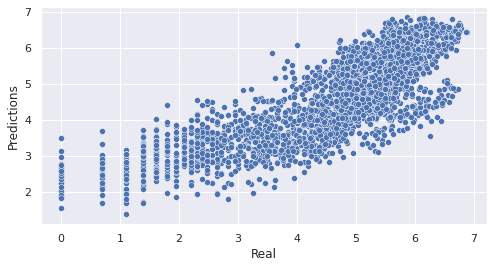

In [35]:
plt.figure(figsize = (8,4))
pred = lm.predict(X_test)
sns.scatterplot(x = y_test, y = pred)
plt.xlabel('Real')
plt.ylabel('Predictions')
plt.show()

<h6>As pointed out in the figure, the variability between the actual values and the predicted values is higher</h6>


/home/qamar/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


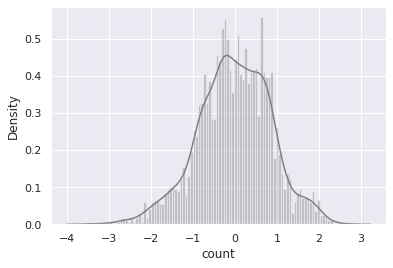

In [36]:
sns.distplot((y_test-pred),bins=100, color = 'gray')
plt.show()

<h6>The residual distribution is normal</h6>

<h3>Hypothesis Testing</h3>

We use a polynomial Features when the straight line (like in Linear Regression) doesn’t fit well our obervations and we want to obtain parabolic effect.

In Polynomial Features the relationship between the independent variable x and the dependent variable y is modelled as an nth degree polynomial in x.

<h6>So, we will use polynomial Features to see if the MSE value will decrease or not knowing that most of our "Features" have a categorical type, so it may cause a problem when using the polynomial feature to decrease MSE
</h6>

In [37]:
# polynomial the data
poly_feat = PolynomialFeatures()
X_train = poly_feat.fit_transform(X_train)
X_test = poly_feat.fit_transform(X_test)

# create an object of LinearRegression Model
lm = LinearRegression()

# fit the model with the training data
lm.fit(X_train, y_train)

# score : efficient proportion of the algorithm is on the training or testing data
print('Linear Regression Train Score is : ' , lm.score(X_train, y_train))
print('Linear Regression Test Score is : ' , lm.score(X_test, y_test))
print('----------------------------------------------------')

# predicting the target value based on "X_test"
y_pred = lm.predict(X_test)

# calculating MSE
MSEValue = mean_squared_error(y_test, y_pred, multioutput='uniform_average') 
print('Mean Squared Error Value is : ', MSEValue)



Linear Regression Train Score is :  0.8746695306375868
Linear Regression Test Score is :  -1.834342356241887e+16
----------------------------------------------------
Mean Squared Error Value is :  3.992654343621505e+16


<h6>As we illustrated before that Linear Regression wouldn't work with our data even if we use hypotheses to increase the MSE value. On the contrary, the polynomial feature gives high MSE</h6>

<h3>
Regularization Model - Ridge</h3>

Ride regression used to solve several problems that linear regression cannot cover.

In [38]:
# create an object of RidgeRegression Model
RidgeRegressionModel = Ridge(alpha=0.001,random_state=33)

# fit the model with the training data
RidgeRegressionModel.fit(X_train, y_train)

# score : efficient proportion of the algorithm is on the training or testing data
print('Ridge Regression Train Score is : ' , RidgeRegressionModel.score(X_train, y_train))
print('Ridge Regression Test Score is : ' , RidgeRegressionModel.score(X_test, y_test))
print('----------------------------------------------------')

# predicting the target value based on "X_test"
y_pred = RidgeRegressionModel.predict(X_test)
print('Predicted Value for Linear Regression is : ' , y_pred[:5])
print('Real Value for Linear Regression is : ' , y_test[:5])

print('----------------------------------------------------')
# calculating MSE
MSEValue = mean_squared_error(y_test, y_pred, multioutput='uniform_average') 
print('Mean Squared Error Value is : ', MSEValue)


Ridge Regression Train Score is :  0.874668949163989
Ridge Regression Test Score is :  0.8579750513309435
----------------------------------------------------
Predicted Value for Linear Regression is :  [2.29289857 2.48706174 5.60740084 5.12032276 5.07024872]
Real Value for Linear Regression is :  9186    2.197225
8442    2.197225
7343    5.283204
2289    5.624018
2558    5.129899
Name: count, dtype: float64
----------------------------------------------------
Mean Squared Error Value is :  0.3091334211831033


<ul>
    <li><h6> The accuracy score seems good</h6></li>
    <li><h6>The MSE here less than MSE in the Linear Regression.</h6></li>
     <li><h6>Note: Ridge regression succeeded in achieving a lower MSE</h6></li>
    </ul>

<h3>Choosing the right value for alpha</h3>

<h6>To select the best value of alpha, we run the Ridge algorithm several times with different values of alpha then we will choose the alpha that reduces the MSE </h6>


In [39]:
# assiging different sets of alpha values to explore which can be the best fit for the model. 
temp_mse = {}
for i in np.linspace(0, 10, 10):
    ridge = Ridge(alpha= i, normalize=True)
    #fit the model. 
    ridge.fit(X_train, y_train)
    # predicting the target value based on "X_test"
    pred = ridge.predict(X_test)

    MSE = mean_squared_error(y_test, y_pred, multioutput='uniform_average') 
    temp_mse[i] = MSE

temp_mse


{0.0: 0.3091334211831033,
 1.1111111111111112: 0.3091334211831033,
 2.2222222222222223: 0.3091334211831033,
 3.3333333333333335: 0.3091334211831033,
 4.444444444444445: 0.3091334211831033,
 5.555555555555555: 0.3091334211831033,
 6.666666666666667: 0.3091334211831033,
 7.777777777777779: 0.3091334211831033,
 8.88888888888889: 0.3091334211831033,
 10.0: 0.3091334211831033}

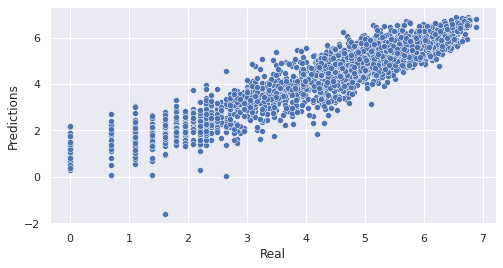

In [40]:
plt.figure(figsize = (8,4))
pred = RidgeRegressionModel.predict(X_test)
sns.scatterplot(x = y_test, y = pred)
plt.xlabel('Real')
plt.ylabel('Predictions')
plt.show()

<h6>We can realize that the variability between the actual values and the predicted values is lesser than the linear regression</h6>


<h2>Because most of our "features"  have a categorical type, we assume that KNN and decision tree algorithms will give us the best accuracy. Let's try KNN and decision tree algorithm</h2></h2>

<h3>K-Nearest Neighbor</h3>

The KNN algorithm assumes that similar things exist in close distance. In other words, similar things are near to each other.

In [41]:
# create an object of KNeighborsRegressor Model
KNeighborsRegressorModel = KNeighborsRegressor(n_neighbors = 8)

# fit the model with the training data
KNeighborsRegressorModel.fit(X_train, y_train)

# score : efficient proportion of the algorithm is on the training or testing data
print('K-Neighbors Regressor Model Train Score is : ' , KNeighborsRegressorModel.score(X_train, y_train))
print('K-Neighbors Regressor Model Test Score is : ' , KNeighborsRegressorModel.score(X_test, y_test))
print('----------------------------------------------------')

# predicting the target value based on "X_test"
y_pred = KNeighborsRegressorModel.predict(X_test)
print('Predicted Value for KNeighborsRegressorModel is : ' , y_pred[:5])
print('Predicted Value for KNeighborsRegressorModel is : ' , y_test[:5])


print('----------------------------------------------------')
# calculating MSE
MSEValue = mean_squared_error(y_test, y_pred, multioutput='uniform_average') 
print('Mean Squared Error Value is : ', MSEValue)


K-Neighbors Regressor Model Train Score is :  0.8780970767878008
K-Neighbors Regressor Model Test Score is :  0.8459179140571953
----------------------------------------------------
Predicted Value for KNeighborsRegressorModel is :  [2.33098209 2.23101393 4.5602228  4.74524089 5.21943283]
Predicted Value for KNeighborsRegressorModel is :  9186    2.197225
8442    2.197225
7343    5.283204
2289    5.624018
2558    5.129899
Name: count, dtype: float64
----------------------------------------------------
Mean Squared Error Value is :  0.3353771489931608


<ul>
    <li><h6> The accuracy score seems good</h6></li>
    <li><h6>  The MSE here a little bigger than MSE in the Linear Regression.</h6></li>
    </ul>

<h3>Choosing the right value for K</h3>

<h6>To select the best value of K, we run the KNN algorithm several times with different values of K then we will choose the K that reduces the MSE </h6>


Minimum MSE error:  0.33467497902211285 at K = 8


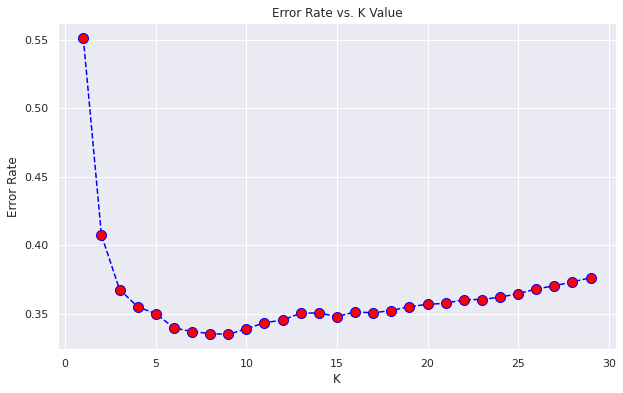

In [42]:
error_rate = []

for i in range(1,30):
 knn = KNeighborsRegressor(n_neighbors=i)
 knn.fit(X_train,y_train)
 y_pred = knn.predict(X_test)
 error_rate.append(mean_squared_error(y_test, y_pred, multioutput='uniform_average'))

plt.figure(figsize=(10,6))
plt.plot(range(1,30),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum MSE error: ",min(error_rate),"at K =",error_rate.index(min(error_rate)))


<h6>Above, we draw the accuracy of each of the values of K from 1 to 30 to get the best K value. We can observe that when K=8 , the model accuracy is the highest</h6>

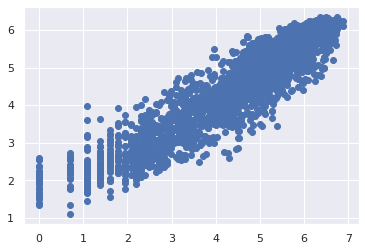

In [43]:
plt.scatter(y_test,y_pred)

<h6>We can realize that the variability between the actual values and the predicted values is a little bigger than the ridge regression</h6>


<h3> Decision Trees </h3>
<p>Decision tree builds regression models in the form of a tree structure. It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. The final result is a tree with decision nodes and leaf nodes</p>
<h6>First, we want to tune decision tree parameters (max_depth and min_samples_leaf )</h6>

In [44]:
from sklearn.tree import DecisionTreeRegressor

# instantiate a Decision Tree Regressor
dt = DecisionTreeRegressor(random_state=0)
dt_params = {'max_depth':np.arange(1,50,2),'min_samples_leaf':np.arange(2,15)}

from sklearn.model_selection import GridSearchCV

# instantiate the GridSearchCV object
gs_dt = GridSearchCV(dt,dt_params,cv=3)
gs_dt.fit(X_train,y_train)
a = gs_dt.best_params_
a

{'max_depth': 19, 'min_samples_leaf': 10}

In [45]:
# create an object of DecisionTreeRegressor Model
DecisionTreeRegressorModel = DecisionTreeRegressor(max_depth=a['max_depth'],
                                                   min_samples_leaf= a['min_samples_leaf'],
                                                   random_state=33)

# fit the model with the training data
DecisionTreeRegressorModel.fit(X_train, y_train)

# score : efficient proportion of the algorithm is on the training or testing data
print('DecisionTreeRegressor Train Score is : ' , DecisionTreeRegressorModel.score(X_train, y_train))
print('DecisionTreeRegressor Test Score is : ' , DecisionTreeRegressorModel.score(X_test, y_test))
print('----------------------------------------------------')

# predicting the target value based on "X_test"
y_pred = DecisionTreeRegressorModel.predict(X_test)
print('Predicted Value for DecisionTreeRegressorModel is : ' , y_pred[:5])
print('Real Value for DecisionTreeRegressorModel is : ' , y_test[:5])

print('----------------------------------------------------')
# calculating MSE
MSEValue = mean_squared_error(y_test, y_pred, multioutput='uniform_average') 
print('Mean Squared Error Value is : ', MSEValue)


DecisionTreeRegressor Train Score is :  0.9528910017913996
DecisionTreeRegressor Test Score is :  0.9141633285408816
----------------------------------------------------
Predicted Value for DecisionTreeRegressorModel is :  [2.35984587 1.95408523 5.3448896  5.75334659 5.31994666]
Real Value for DecisionTreeRegressorModel is :  9186    2.197225
8442    2.197225
7343    5.283204
2289    5.624018
2558    5.129899
Name: count, dtype: float64
----------------------------------------------------
Mean Squared Error Value is :  0.1868332582394279


<ul>
    <li><h6> Accuracy is the highest value here</h6></li>
    <li><h6>The MSE here is the least one of all  algorithms</h6></li>
     <li><h6>Note: Decision tree succeeded in achieving the lowest "MSE"</h6></li>
    </ul>

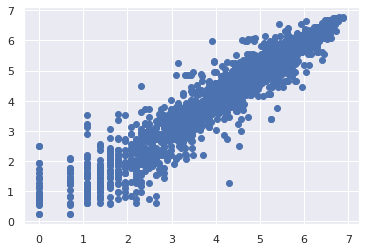

In [46]:
plt.scatter(y_test,y_pred)

<h6>*** The variability between the actual values and the predicted values is the minimum one here *** </h6>

<h5>Feature Importances</h5>
<p>The feature engineering process involves selecting the minimum required features to produce a valid model because the more features a model contains, the more complex it is (and the more sparse the data), therefore the more sensitive the model is to errors due to variance. A common approach to eliminating features is to describe their relative importance to a model, then eliminate weak features or combinations of features and re-evalute to see if the model fairs better during cross-validation.
 In scikit-learn, Decision Tree models and ensembles of trees provide a feature_importances_ attribute when fitted.</p>
<h6>So, it's a technique that assign a score to input features based on how useful they are at predicting a target variable</h6>

In [47]:
DTR =DecisionTreeRegressorModel.feature_importances_

<h3>Visualizing decision tree</h3>

In [48]:
from sklearn.tree import plot_tree
"""
plt.figure(figsize=(25,10))
_ = plot_tree(DecisionTreeRegressorModel, 
                   feature_names=X_train.columns,  
                   class_names=y_test,
                   fontsize=17,max_depth=3,
                   filled=True) """


'\nplt.figure(figsize=(25,10))\n_ = plot_tree(DecisionTreeRegressorModel, \n                   feature_names=X_train.columns,  \n                   class_names=y_test,\n                   fontsize=17,max_depth=3,\n                   filled=True) '

<h2>Conclusion</h2>
<h6>Mean Squared Error of the predicted rental count per hour for the above models :<h6>
<table>
  <tr>
    <th>ML Algorithim</th>
    <th>MSE</th>
  </tr>
  <tr>
    <td>Linear Regression</td>
    <td>0.7543384566</td>
  </tr>
  <tr>
    <td>Regularization Model - Ridge</td>
    <td>0.3091334211</td>
  </tr>
  <tr>
    <td>K-Nearest Neighbor</td>
    <td>0.3353771489</td>
  </tr>
    <tr>
    <td>Decision Trees</td>
    <td>0.1868332582</td>
  </tr>
</table>
<h6>After Analyzing errors and testing our models we reached finally the minimum value of Mean Square Error </h6>
  